<a href="https://colab.research.google.com/github/AeschlimannMichael/data-science-fundamentals/blob/main/Kopie_von_02_Intro_Pandas_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Pandas and Numpy


Python has several built-in types of data structures such as lists and dictionaries, but none of them allows you to efficiently do computations on large lists or tables of data. The Numpy and Pandas libraries fill this gap by providing 1) specific data structures on which one can efficiently compute and 2) functions to perform the computations on these structures.

Numpy is the core scientific computing library on which virtually all other scientific Python packages are building (except for deep learning libraries). This includes notably Scipy, a package offering numerical routines for optimization, regression etc. that will be used in the last series of lectures.

Pandas, which itself builds on top of Numpy, is the core data science library on which higher level libraries (e.g. for plotting) are building. 

Here we briefly present the main data structure offered by Pandas, the **DataFrame** and then show how the data in DataFrames are actually **arrays**, the main data structure of Numpy. This allows us in the next notebooks to explore Numpy before coming back at the end of the course to Pandas.

Let's first import both Pandas and Numpy. Both have very commonly used abbreviations ```np``` and ```pd``` that you should use as well to simplify your life. Note that most sub-modules are directly accessible and you won't have to import specific ones as migth be the case for other libraries.

In [ ]:
import pandas as pd
import numpy as np

## Importing data

Just like any other library, Pandas offers functionality through the *dot-notation* (as e.g. in ```math.cos()```). When surveying usage of Pandas in places like GitHub, it turns out that the most used function is the one allowing one to import a CSV (comma-separated values). Indeed while we could import tabular data with the ```read``` function, this becomes quickly cumbersome for complex data and Pandas takes care of all details for us. 


### read_*** functions

As an example we import here the file available [here](https://github.com/KingaS03/Introduction-to-Python/blob/master/Homework/country_vaccinations.xls). If we look at the file we see that even though it has an .xls extension, it is in fact just a CSV file. Pandas has many importing functions and we use here ```read_csv```. You can see the list of all available importers by typing ```pd.read_``` and seeing options from autocomplete.

We can either download the file and indicate the file path or directly *read* it from the web (*Note that on GitHub you need to use the [raw](https://raw.githubusercontent.com/KingaS03/Introduction-to-Python/master/Homework/country_vaccinations.xls) version of the file to download it*)

```
url = 'https://raw.githubusercontent.com/KingaS03/Introduction-to-Python/master/Homework/country_vaccinations.xls'
vaccine = pd.read_csv(url)
```

In [ ]:
url = 'https://raw.githubusercontent.com/KingaS03/Introduction-to-Python/master/Homework/country_vaccinations.xls'
vaccine = pd.read_csv(url)

NameError: ignored

Let's first see what this object is:

```
type(vaccine)
```

We see that we are dealing with a DataFrame, the two-dimensional data structure offered by Pandas. If we just execute a cell with that variable we can display the first lines:

```
vaccine
```

We see that we are dealing with tabular data of various types: we have text (e.g. countries), dates and numbers. Just like in a tabular sheet, each column has a label and each line has an index (column in bold on the left), so that every element can be located with these *coordinates*.

## Methods attached to dataframes

We have seen before that every variable in Python has a series of functions attached to it (methods). For example if we have a text variable (string) we can e.g. split it at a given place:

```
my_string = 'This is a sentence with spaces.'
my_string.split(' ')
```

The same logic applies to Pandas DataFrames and in general to any new variable that is created by a given package: they all come with a series of methods attached to them.

For example if we only want to display the fist 5 lines of the DataFrame, we can use the ```head``` method:

vaccine.head(5)

We will learn later how to extract statistics, but just as an example of functions that exsit, you can for example get a basic statistical description of a DataFrame using the ```describe``` method:

vaccine.describe()

We see that in this particular case, the returned object is a DataFrame as well!

## Accessing columns

If we want to work with only a given column from a dataframe, we can extract it. Just like when we want to extract an element from a regular list, e.g. ```my_list[3]```, for Pandas we also use the square parenthesis (brackets) but this time with the name of the column:

```
some_column = vaccine['daily_vaccinations']
some_column
```

As we have a single columns here, we are not dealing with a DataFrame anymore but with a Series:

type(some_column)

We won't explore much the Series object on its own in this course, but know that you can for example create a DataFrame from scratch by combining multiple Series.

## What is underlying Pandas

We see above that ```some_column``` is composed of and index (0, 1, 2 etc) and the corresponding values (NaN, 64.0, 64.0 etc.). If we want to do mathematics with those values, we don't really need the index and a list of numbers would be sufficient. We can obtain such a list by asking for the ```values``` of the series:

```actual_values = some_column.values
actual_values
```

We see that the output is not just a simple Python list. It is in fact called an ```array```. If we ask for the type of this object, we get:

type(actual_values)

The lists of values contained in Pandas DataFrame are in fact Numpy arrays. A large part of the computing logic in Pandas is inspired from Numpy, therefore we now make a detour to Numpy before coming back to DataFrames.

## Exercise


1. In the Data folder on Ilias there is the data file 4ms_10 av_30 s_Absorbance_10-32-04-868.txt. Upload this file to a folder on your google drive. If you don't have a google account, make it now. Look at the file by clicking on it. Try to make sense of the data with the help of the metadata file also in the Ilias folder. 

2. Mount the file to this your notebook (example code below). The path and the file name must match the ones on your google drive, of course.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/data science data/P3HT_Abs_data_Teaching.txt' # To be adapte


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Study and play with the code below. Try to understand based on the API description (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Hint: Use the header argument.

In [ ]:
import pandas as pd
df = pd.read_csv(path, delimiter='\t')
print(df)

               0  0.1  343.5134104  ...  1644.818256  1650.358554  1655.895891
0          0.000  0.6 -1027.768828  ...    22.495454    22.559864    24.724922
1          0.013  0.6  -634.010574  ...    23.484311    23.336777    23.891699
2          0.022  0.6  -720.771924  ...    24.227429    22.818681    25.003017
3          0.027  0.6  -442.747518  ...    20.033077    23.855489    25.003017
4          0.033  0.6          NaN  ...    22.001865    22.559864    27.234184
...          ...  ...          ...  ...          ...          ...          ...
42465  11900.081  0.6  -957.183252  ...    49.751830    49.783737    51.969050
42466  11900.086  0.6  -317.149860  ...    53.978037    51.439321    49.902464
42467  11900.091  0.6   -85.343988  ...    54.775031    53.656589    50.786945
42468  11900.096  0.6  -761.279047  ...    52.388406    52.269476    47.552579
42469  11900.101  0.6          NaN  ...    51.859814    50.059231    48.725939

[42470 rows x 238 columns]


4. Study this dataset a bit with the df.head(), df.info() and df.describe() methods. The available metadata is [here](https://docs.google.com/document/d/1L6m4OFiCKSHlHlr4_4TFKLKHcJfIkiMhHtD3tcsxpD8/edit?usp=sharing)

In [ ]:
df.head()

,0,0.1,343.5134104,349.5870756,355.6494241,361.7004283,367.7400609,373.7682942,379.7851007,385.7904529,391.7843234,397.7666847,403.7375091,409.6967692,415.6444375,421.5804865,427.5048886,433.4176164,439.3186424,445.207939,451.0854787,456.951234,462.8051775,468.6472816,474.4775187,480.2958614,486.1022822,491.8967536,497.679248,503.4497379,509.2081959,514.9545944,520.688906,526.411103,532.121158,537.8190435,543.504732,549.1781959,554.8394078,560.4883401,...,1437.781643,1443.428733,1449.073007,1454.714462,1460.353094,1465.988898,1471.62187,1477.252007,1482.879305,1488.50376,1494.125368,1499.744125,1505.360026,1510.973069,1516.58325,1522.190563,1527.795006,1533.396575,1538.995265,1544.591072,1550.183994,1555.774025,1561.361162,1566.945401,1572.526738,1578.105169,1583.680691,1589.253298,1594.822988,1600.389757,1605.9536,1611.514513,1617.072493,1622.627536,1628.179638,1633.728794,1639.275002,1644.818256,1650.358554,1655.895891
0,0.000,0.6,-1027.768828,30.511045,281.801881,265.172363,237.292980,254.240534,190.109116,183.177334,263.885371,317.457970,336.876661,349.040277,377.016174,404.868213,436.990276,472.828500,514.894670,559.846567,604.457809,654.387595,706.444980,756.841447,809.442613,861.677687,907.934867,950.434372,990.895947,1026.472836,1059.376844,1082.788884,1093.645373,1091.504515,1084.046082,1079.263808,1076.705601,1072.974885,1057.701186,1023.945682,...,25.490118,25.432884,25.684670,25.913553,25.909968,26.310930,27.010930,27.848403,28.952925,30.213329,30.711874,31.149079,30.739064,30.144906,29.320132,28.584882,28.041254,27.543042,27.210474,26.928211,26.529187,30.842797,24.933229,26.250112,25.079186,25.816938,25.824600,25.589306,29.237694,25.735974,23.671892,25.906182,23.389142,21.642225,21.016180,21.301218,22.898130,22.495454,22.559864,24.724922
1,0.013,0.6,-634.010574,-7.724907,102.303772,155.099472,238.064645,316.866260,301.584506,257.617348,260.870249,293.342315,326.757369,364.511356,397.233049,418.455625,441.823029,474.729558,516.072486,560.662118,605.510434,653.766926,704.362383,758.437145,814.569590,865.990779,911.769923,952.610017,992.089034,1027.008948,1059.286662,1082.652835,1095.135307,1094.612361,1086.219772,1079.132461,1076.396469,1072.295717,1057.376934,1023.355987,...,25.218051,25.092860,25.291310,25.506243,25.430852,25.782601,26.433933,27.146112,28.078711,29.197019,29.685109,29.761583,29.589602,29.184017,28.522660,27.952015,27.439204,27.108781,26.835214,26.669766,26.527303,26.139143,25.934073,28.003447,23.523593,24.414320,25.184368,25.290234,25.298307,25.735974,23.169427,21.764048,24.341897,22.347100,20.549339,21.536516,20.977320,23.484311,23.336777,23.891699
2,0.022,0.6,-720.771924,121.087152,301.837486,278.988892,298.318623,290.589190,312.118275,294.980704,304.081591,314.942744,336.585847,358.985109,383.023669,416.281554,451.005610,485.648011,517.492723,556.001257,602.467483,653.986409,700.909165,754.409902,812.218764,864.582432,910.729945,951.749135,991.374490,1027.609759,1059.715330,1082.092499,1092.107421,1091.100715,1083.476001,1078.298072,1076.991842,1074.086979,1059.553497,1024.811223,...,25.084514,24.931047,25.208362,25.363812,25.227694,25.626073,26.296893,27.053596,27.977096,29.197603,29.581181,30.036417,29.626360,28.687716,27.954195,27.505588,27.103005,26.760715,26.382391,26.170943,26.107022,20.907531,28.446284,25.812878,22.360530,26.168298,26.145068,27.989297,23.899962,26.264857,21.415348,25.416825,21.963903,18.600867,18.454721,22.950976,22.657566,24.227429,22.818681,25.003017
3,0.027,0.6,-442.747518,722.925937,600.086121,538.586982,412.512638,409.426168,378.591047,382.863347,330.417153,339.646500,362.353432,386.541907,406.819867,426.973410,451.433536,480.181863,518.057940,561.384422,606.740276,654.279817,703.309446,758.481657,812.770727,863.967491,908.787094,949.061701,990.091168,1028.613097,1063.248580,1085.221955,1093.951550,1090.843232,1086.116160,1082.690197,1080.284284,1074.657119,1059.758891,1024.808881,...,24.994478,24.801367,24.957891,25.147925,25.034086,25.332563,25.901120,26.551308,27

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42470 entries, 0 to 42469
Columns: 238 entries, 0 to 1655.895891
dtypes: float64(238)
memory usage: 77.1 MB


In [ ]:
df.describe()

,0,0.1,343.5134104,349.5870756,355.6494241,361.7004283,367.7400609,373.7682942,379.7851007,385.7904529,391.7843234,397.7666847,403.7375091,409.6967692,415.6444375,421.5804865,427.5048886,433.4176164,439.3186424,445.207939,451.0854787,456.951234,462.8051775,468.6472816,474.4775187,480.2958614,486.1022822,491.8967536,497.679248,503.4497379,509.2081959,514.9545944,520.688906,526.411103,532.121158,537.8190435,543.504732,549.1781959,554.8394078,560.4883401,...,1437.781643,1443.428733,1449.073007,1454.714462,1460.353094,1465.988898,1471.62187,1477.252007,1482.879305,1488.50376,1494.125368,1499.744125,1505.360026,1510.973069,1516.58325,1522.190563,1527.795006,1533.396575,1538.995265,1544.591072,1550.183994,1555.774025,1561.361162,1566.945401,1572.526738,1578.105169,1583.680691,1589.253298,1594.822988,1600.389757,1605.9536,1611.514513,1617.072493,1622.627536,1628.179638,1633.728794,1639.275002,1644.818256,1650.358554,1655.895891
count,42470.000000,42470.000000,5894.000000,17932.000000,41599.000000,42291.000000,42322.000000,42441.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,...,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000,42470.000000
mean,5830.826203,0.200750,-601.035115,423.873652,419.355900,416.174606,418.524032,407.370375,384.751880,352.487634,334.347343,333.293125,342.854754,357.980517,376.626514,398.675253,423.550266,451.207795,481.875621,514.964886,549.834424,586.449786,624.790799,664.843843,705.585332,743.898576,778.149461,809.219689,838.325821,864.916769,887.623007,903.721157,911.666308,912.196229,908.773820,904.907113,901.247078,894.965327,880.929505,854.072117,...,81.699113,82.179556,82.988625,83.910935,84.843907,86.219087,88.026310,90.332861,93.312956,96.862415,100.160688,102.966891,104.914933,106.171946,107.145525,108.056966,108.918498,109.636608,110.190972,110.725256,111.128502,107.294879,108.195370,109.085978,108.103827,108.348440,109.630376,110.876065,111.919536,112.117511,112.744029,113.465919,114.569909,114.267718,114.606774,115.839652,117.573047,117.197294,116.041130,117.307337
std,3445.060499,0.433622,458.518463,294.617692,100.105305,85.505253,84.744438,73.482648,58.623138,42.739553,35.756987,36.249713,39.745965,44.400724,49.915969,56.415690,63.902357,72.431541,82.222096,93.146625,105.063706,118.012409,132.089254,147.241245,162.939829,177.967689,191.621541,204.048731,215.782651,226.959019,236.713589,243.410075,245.989423,244.971765,242.481479,240.718633,240.474959,240.109193,236.207777,225.512679,...,108.195486,109.119487,110.122983,111.236139,112.543314,114.109716,116.028513,118.502771,121.753069,125.760964,130.110705,134.090513,137.209576,139.635454,141.725301,143.555881,145.174173,146.610009,147.868008,148.975599,149.943901,144.807623,146.435765,148.175200,149.922257,150.731264,151.646595,152.793930,153.686620,154.316400,155.510782,156.485881,157.296643,158.158806,159.165875,159.724721,160.505019,161.148564,161.553146,162.162792
min,0.000000,-0.600000,-1482.932984,-204.758791,41.060065,49.544379,42.804108,87.569775,84.449242,102.825068,141.539951,165.491761,178.571325,177.800508,181.762225,188.252637,193.504452,195.399171,200.011877,205.443204,209.946887,213.302180,217.338355,221.838165,22

How big is the dataset? How many rows, how many columns, how space in the memory? The data are spectral lines from some chemistry experiment with some other information in the first four columns. We will come back to this dataset later.  

5. Plot some columns.

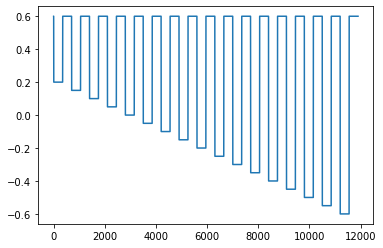

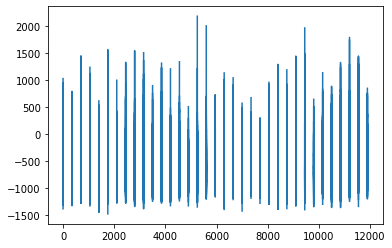

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



fig=plt.figure()
ax=plt.axes()
plt.plot(df.iloc[:,0],df.iloc[:,1])
plt.show()

fig=plt.figure()
ax=plt.axes()
plt.plot(df.iloc[:,0],df.iloc[:,2])
plt.show()

6. Check out other pandas read methods here: https://pandas.pydata.org/docs/reference/io.html